In [1]:
library("rcompanion") #assessing normality with histograms
library("car") ##HoV 
library("effects") #assists with means adj by covariate
library("multcomp") #post hocs with ANCOVAs

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'


The following object is masked from 'package:MASS':

    geyser




In [12]:
graduate_admissions <- read.csv("C:/Users/Marcy/Documents/Entity Coursework/DSO 105 Basic Stats in Python/Lesson 7/graduate_admissions.csv")

In [13]:
head(graduate_admissions)

,Serial.No.,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,337,118,4,4.5,4.5,9.65,1,0.92
2,2,324,107,4,4.0,4.5,8.87,1,0.76
3,3,316,104,3,3.0,3.5,8.00,1,0.72
4,4,322,110,3,3.5,2.5,8.67,1,0.80
5,5,314,103,2,2.0,3.0,8.21,0,0.65
6,6,330,115,5,4.5,3.0,9.34,1,0.90


#### predict a student's college GPA (CGPA), holding the TOEFL Score (TOEFL_Score) constant and using their university's rating (University.Rating) as as a predictor.

#### Test assumptions

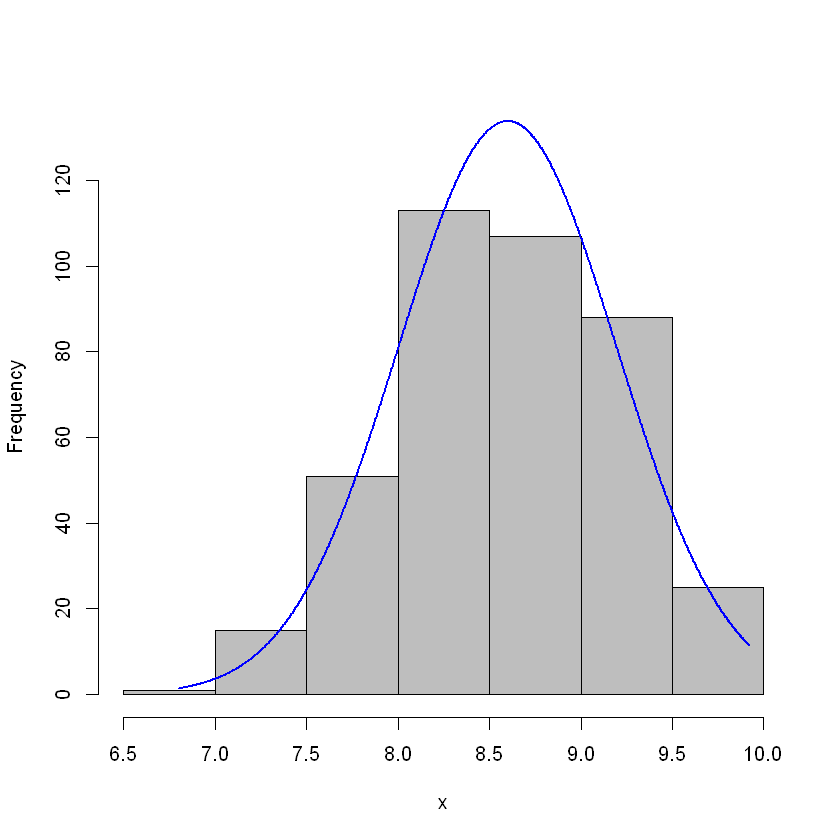

In [14]:
plotNormalHistogram(graduate_admissions$CGPA)

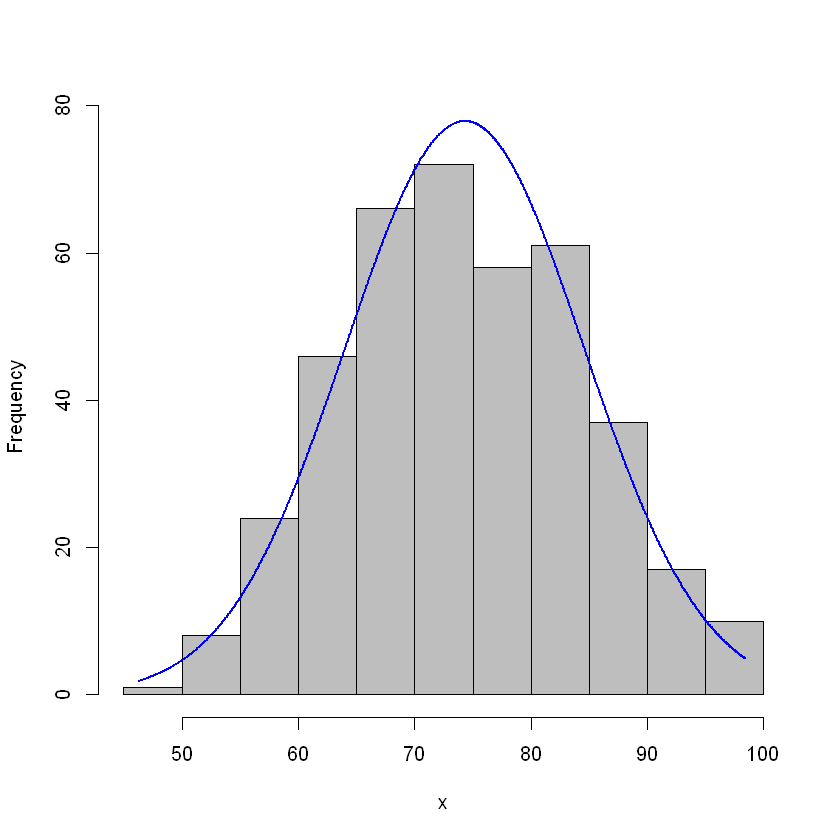

In [15]:
graduate_admissions$CGPAsq <- graduate_admissions$CGPA * graduate_admissions$CGPA
plotNormalHistogram(graduate_admissions$CGPAsq)

#### Now to check TOEFL score

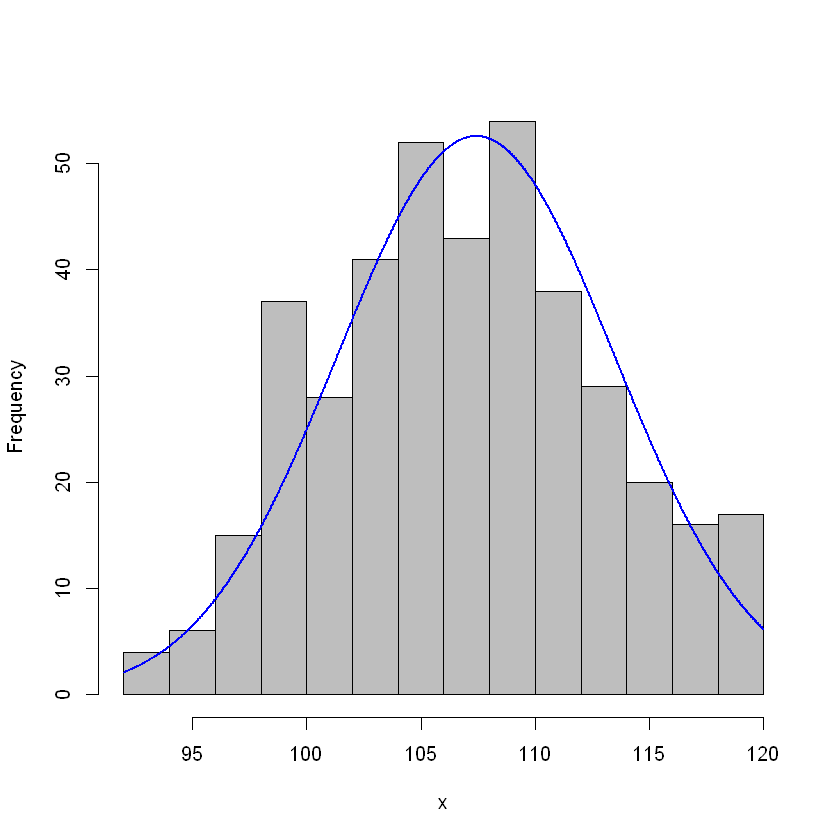

In [16]:
plotNormalHistogram(graduate_admissions$TOEFL.Score)

#### Looks good!

#### test for homogeneity of variance assumption

In [19]:
graduate_admissions$CGPA <- as.integer(graduate_admissions$CGPA)

In [20]:
leveneTest(CGPAsq~University.Rating, data=graduate_admissions)

ERROR: Error in leveneTest.formula(CGPAsq ~ University.Rating, data = graduate_admissions): Levene's test is not appropriate with quantitative explanatory variables.


In [21]:
Homogeneity_RegrSlp = lm(CGPA~TOEFL.Score, data=graduate_admissions)
anova(Homogeneity_RegrSlp)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TOEFL.Score,1,98.75439,98.7543940,549.3786,5.858855e-77
Residuals,398,71.54311,0.1797565,NA,NA


#### sample size is met.  run analysis

In [22]:
ANCOVA = lm(CGPA~TOEFL.Score + University.Rating*TOEFL.Score, data=graduate_admissions)
anova(ANCOVA)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TOEFL.Score,1,98.75439398,98.75439398,610.7373070,2.998410e-82
University.Rating,1,7.48872170,7.48872170,46.3132984,3.741625e-11
TOEFL.Score:University.Rating,1,0.02236995,0.02236995,0.1383449,7.101310e-01
Residuals,396,64.03201437,0.16169701,NA,NA


#### post hocs

In [23]:
postHocs <- glht(ANCOVA,linfct=mcp(University.Rating = "Tukey"))
summary(postHocs)

ERROR: Error in mcp2matrix(model, linfct = linfct): Variable(s) 'University.Rating' of class 'integer' is/are not contained as a factor in 'model'.


In [24]:
adjMeans <- effect("University.Rating", ANCOVA)
adjMeans

NOTE: University.Rating is not a high-order term in the model




 University.Rating effect
University.Rating
       1        2        3        4        5 
7.803217 7.970615 8.138013 8.305411 8.472809 

## all have a college GPA that's almost the same.